# Final Portfolio Project 2026 - Regression Task
## 5CS037 - Concepts and Technologies of AI

**Student Name:** Biplov Maharjan  
**Student ID:** 2462258  

---

**Objective:** Predict the average price of avocados based on sales volume, type, and region.
**Dataset:** `avocado.csv`
**Approach:** 
1. Implement Models (**Neural Network, Linear Regression, KNN**) using **Scikit-Learn**.
2. Perform **Hyperparameter Optimization (Grid Search)** for Linear Regression (Ridge) and KNN.
3. Perform **Feature Selection**.
4. Compare the optimized models.

## Table of Contents
1. [Import Libraries & Load Data](#setup)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Data Preprocessing](#preprocessing)
4. [Base Models Implementation](#models)
    - [Neural Network (MLPRegressor)](#nn)
    - [Linear Regression](#linreg)
    - [KNN Regressor](#knn)
5. [Initial Model Evaluation](#evaluation)
6. [Hyperparameter Optimization (GridSearchCV)](#optimization)
7. [Feature Selection](#features)
8. [Final Models & Comparative Analysis](#final)
9. [Conclusion](#conclusion)

## 1. Import Libraries & Load Data <a id='setup'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Models & Utilities
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load Dataset
try:
    df = pd.read_csv('regression/avocado.csv')
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    print(f"Dataset Loaded Successfully. Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("Error: Dataset not found. Please check the path.")

Dataset Loaded Successfully. Shape: (18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 2. Exploratory Data Analysis (EDA) <a id='eda'></a>
Analyzing price trends and feature distributions.

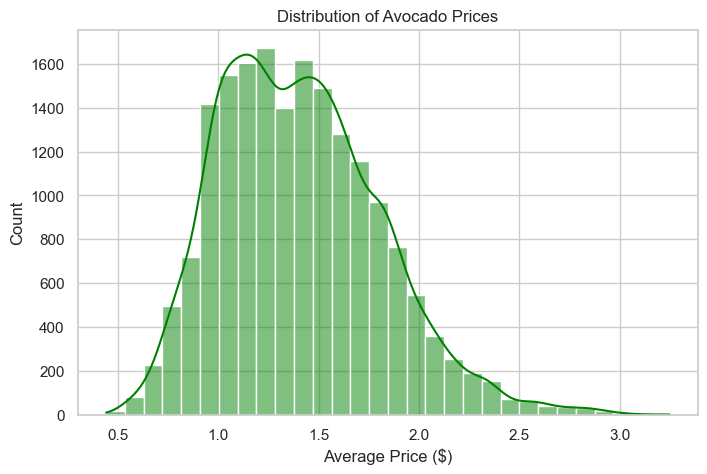

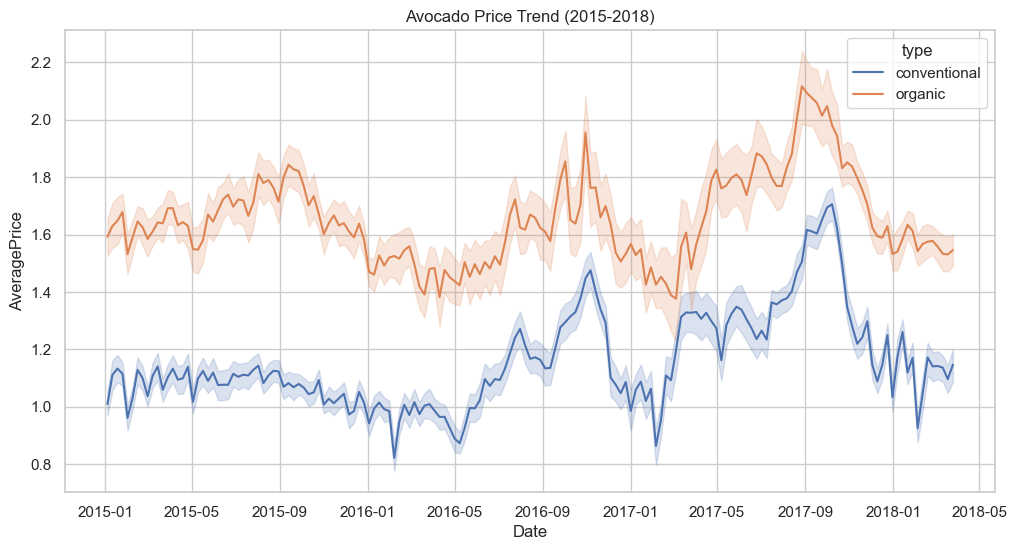

C:\Users\user\AppData\Local\Temp\ipykernel_64924\1213358446.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='AveragePrice', data=df, palette='Pastel1')


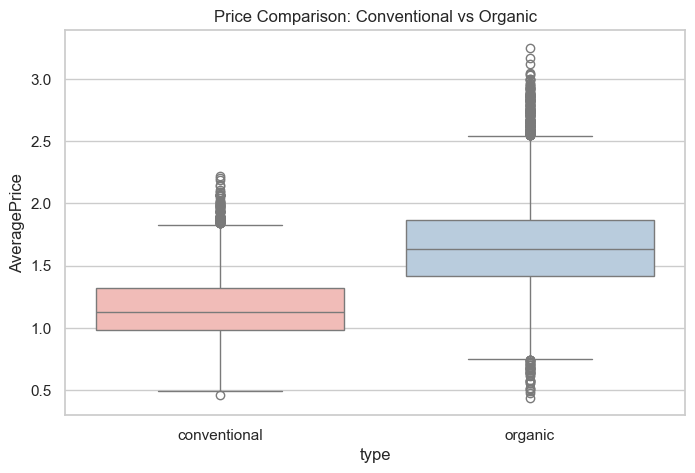

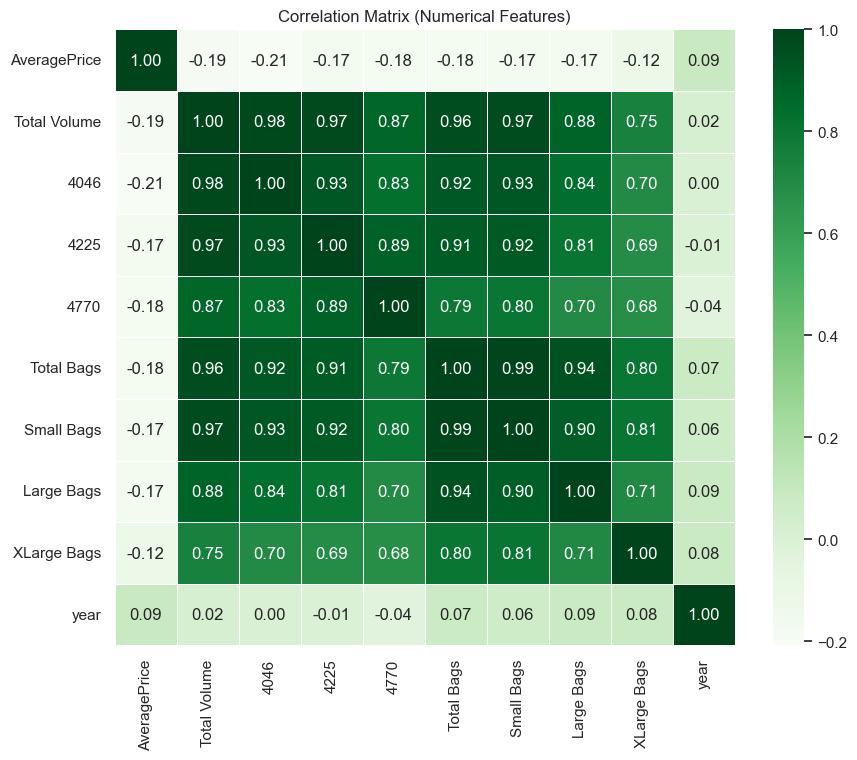

In [2]:
# 2.1 Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['AveragePrice'], bins=30, kde=True, color='green')
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price ($)')
plt.show()

# 2.2 Price Trend Over Time
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df)
plt.title('Avocado Price Trend (2015-2018)')
plt.show()

# 2.3 Price vs Type Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='AveragePrice', data=df, palette='Pastel1')
plt.title('Price Comparison: Conventional vs Organic')
plt.show()

# 2.4 Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Greens', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

## 3. Data Preprocessing <a id='preprocessing'></a>
Preparing the data for regression.

In [3]:
# 1. Feature Engineering: Extract Month from Date
df['Month'] = df['Date'].dt.month

# 2. Drop non-numeric/irrelevant columns
df_clean = df.drop(columns=['Date'], errors='ignore')

# 3. Encode Categorical Variables
le = LabelEncoder()
for col in ['type', 'region']:
    df_clean[col] = le.fit_transform(df_clean[col])

# 4. Split Features (X) and Target (y)
feature_names = df_clean.drop('AveragePrice', axis=1).columns
X = df_clean.drop('AveragePrice', axis=1).values
y = df_clean['AveragePrice'].values

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Testing Data Shape: {X_test_scaled.shape}")

Training Data Shape: (14599, 12)
Testing Data Shape: (3650, 12)


## 4. Base Models Implementation <a id='models'></a>
Initializing Scikit-Learn Regression models.

In [4]:
# 4.1 Neural Network Regressor (MLPRegressor)
nn_reg = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 4.2 Linear Regression
lin_reg = LinearRegression()

# 4.3 KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

## 5. Initial Model Evaluation <a id='evaluation'></a>
Evaluating baseline performance.

---- Training Neural Network Regressor ----


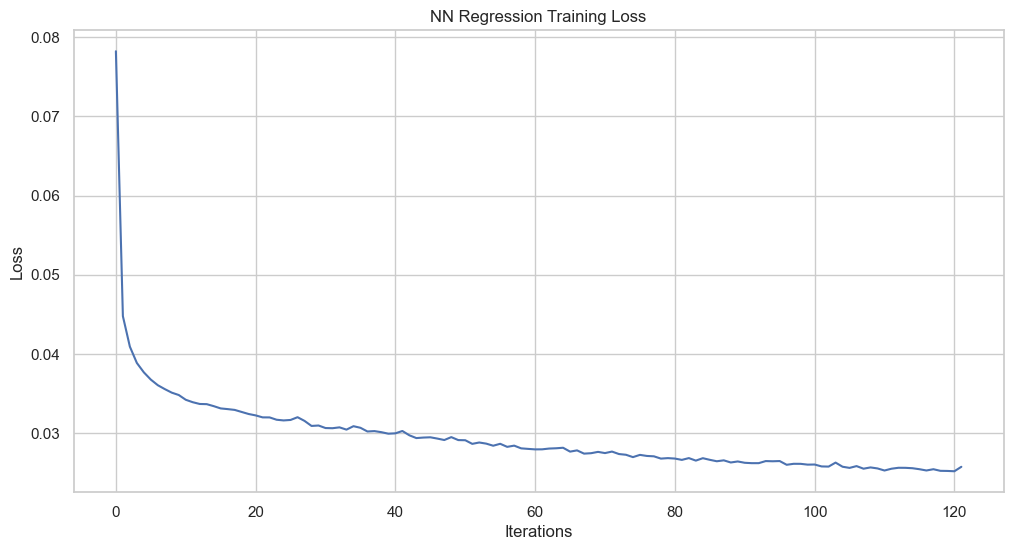

NN R2 Score: 0.6501
NN MSE: 0.0562
NN MAE: 0.1720

---- Training Linear Regression ----
LinReg R2 Score: 0.4322
LinReg MSE: 0.0912
LinReg MAE: 0.2331

---- Training KNN Regressor (k=5) ----
KNN R2 Score: 0.7556
KNN MSE: 0.0393
KNN MAE: 0.1387


In [5]:
# 1. Train Neural Network Regressor
print("---- Training Neural Network Regressor ----")
nn_reg.fit(X_train_scaled, y_train)

# Plot Loss
plt.plot(nn_reg.loss_curve_)
plt.title('NN Regression Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Evaluate NN
y_pred_nn = nn_reg.predict(X_test_scaled)
print(f"NN R2 Score: {r2_score(y_test, y_pred_nn):.4f}")
print(f"NN MSE: {mean_squared_error(y_test, y_pred_nn):.4f}")
print(f"NN MAE: {mean_absolute_error(y_test, y_pred_nn):.4f}")

# 2. Train Linear Regression
print("\n---- Training Linear Regression ----")
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

print(f"LinReg R2 Score: {r2_score(y_test, y_pred_lin):.4f}")
print(f"LinReg MSE: {mean_squared_error(y_test, y_pred_lin):.4f}")
print(f"LinReg MAE: {mean_absolute_error(y_test, y_pred_lin):.4f}")

# 3. Train KNN Regressor
print("\n---- Training KNN Regressor (k=5) ----")
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)

print(f"KNN R2 Score: {r2_score(y_test, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test, y_pred_knn):.4f}")
print(f"KNN MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}")

## 6. Hyperparameter Optimization (GridSearchCV) <a id='optimization'></a>
We will tune **Linear Regression (via Ridge)** and **KNN**.

In [6]:
# 6.1 Optimize Linear Regression (Using Ridge for parameter tuning)
# Standard OLS LinearRegression has no hyperparameters, so we tune Ridge alpha
print("---- Optimizing Linear Model (Ridge) ----")
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
grid_lin = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_lin.fit(X_train_scaled, y_train)

best_lin_model = grid_lin.best_estimator_
print(f"Best Alpha: {grid_lin.best_params_['alpha']}")
print(f"Best CV R2: {grid_lin.best_score_:.4f}")

# 6.2 Optimize KNN
print("\n---- Optimizing KNN Regressor ----")
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
grid_knn.fit(X_train_scaled, y_train)

best_knn_model = grid_knn.best_estimator_
print(f"Best K: {grid_knn.best_params_['n_neighbors']}")
print(f"Best CV R2: {grid_knn.best_score_:.4f}")

---- Optimizing Linear Model (Ridge) ----
Best Alpha: 10
Best CV R2: 0.4390

---- Optimizing KNN Regressor ----
Best K: 3
Best CV R2: 0.7768


## 7. Feature Selection <a id='features'></a>
Selecting top correlated features.

In [7]:
correlations = []
for i in range(X.shape[1]):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append(abs(corr))

feature_imp = pd.DataFrame({'Feature': feature_names, 'Correlation': correlations})
feature_imp = feature_imp.sort_values(by='Correlation', ascending=False)

print("Top Features by Correlation:")
print(feature_imp.head(10))

top_5_features = feature_imp['Feature'].head(5).values
top_5_indices = feature_imp.index[:5].values

print("\nSelected Features:", top_5_features)

X_train_selected = X_train_scaled[:, top_5_indices]
X_test_selected = X_test_scaled[:, top_5_indices]

Top Features by Correlation:
         Feature  Correlation
8           type     0.615845
1           4046     0.208317
0   Total Volume     0.192752
3           4770     0.179446
4     Total Bags     0.177088
5     Small Bags     0.174730
6     Large Bags     0.172940
2           4225     0.172928
11         Month     0.162409
7    XLarge Bags     0.117592

Selected Features: ['type' '4046' 'Total Volume' '4770' 'Total Bags']


## 8. Final Models & Comparative Analysis <a id='final'></a>
Training optimized models on selected features.


Comparative Analysis (Final Models):


,Model,R2 Score,MAE,MSE
0,Linear Regression (Ridge),0.376429,0.244939,0.100189
1,KNN Regressor,0.523716,0.188276,0.076524


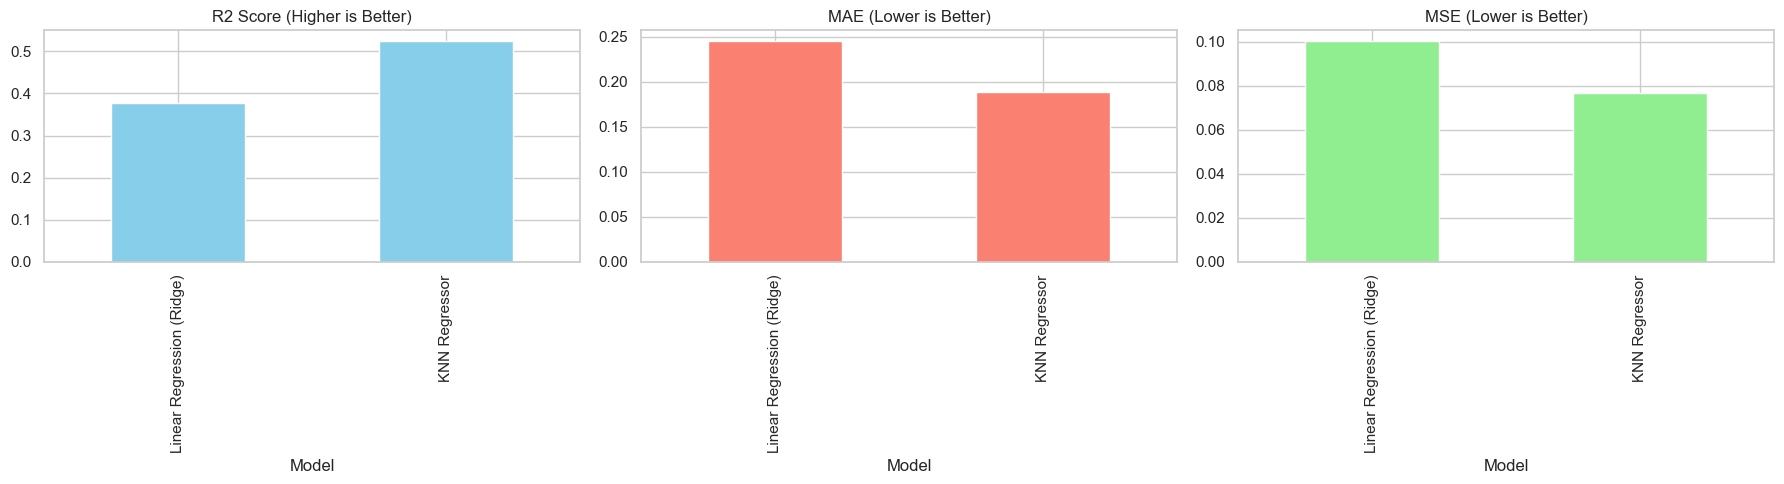

In [8]:
# 1. Train Final Linear Model
final_lin = Ridge(alpha=grid_lin.best_params_['alpha'])
final_lin.fit(X_train_selected, y_train)
y_pred_final_lin = final_lin.predict(X_test_selected)

# 2. Train Final KNN
final_knn = KNeighborsRegressor(n_neighbors=grid_knn.best_params_['n_neighbors'])
final_knn.fit(X_train_selected, y_train)
y_pred_final_knn = final_knn.predict(X_test_selected)

# 3. Metrics Comparison
results = {
    'Model': ['Linear Regression (Ridge)', 'KNN Regressor'],
    'R2 Score': [
        r2_score(y_test, y_pred_final_lin), 
        r2_score(y_test, y_pred_final_knn)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_final_lin), 
        mean_absolute_error(y_test, y_pred_final_knn)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_final_lin), 
        mean_squared_error(y_test, y_pred_final_knn)
    ]
}

results_df = pd.DataFrame(results)
print("\nComparative Analysis (Final Models):")
display(results_df)

# Visual Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot R2 Score
results_df.set_index('Model')['R2 Score'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('R2 Score (Higher is Better)')

# Plot MAE
results_df.set_index('Model')['MAE'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('MAE (Lower is Better)')

# Plot MSE
results_df.set_index('Model')['MSE'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('MSE (Lower is Better)')

plt.tight_layout()
plt.show()

## 9. Conclusion <a id='conclusion'></a>

In this regression analysis:
1. We implemented Regression models using Scikit-Learn libraries.
2. We used GridSearchCV to optimize hyperparameters.
3. We selected the Top 5 most correlated features.
4. The Final Model comparison highlights which approach better models the avocado price data.